# 6. 머신러닝의 이해

# 6-1. 머신러닝 교차검증 개념 및 기법

# 교차검증

### 교차 검증의 기본 철차와 필요성

- 교차검증의 기본 철차

    1. 교차 검증 1단계에서는 데이터를 학습용과 테스트용으로 나눔

    2. 모델의 테스트 성능을 기록

    3. 교차 검증의 매 단계마다 다른 파티션으로 위의 작업을 수행

    4. 모델의 최종 성능은 매 단계의 테스트 성능을 평균 계산


- 교차검증은 모델의 변동성을 줄여주며 오버피팅과 같은 문제를 막아줌

- 교차검증을 통해 모든 데이터를 학습용 데이터로 사용할 수 있음

### 교차 검증 기법

- k 폴드 교차 검증

    - 데이터를 무작위로 k개의 동일한 크기인 폴드로 나눔(보통 k값으로 3, 5, 10 을 많이 사용)

    - 각 시행 단계에서 특정 폴드를 테스트용으로, 나머지는 학습용으로 사용

    - 각 폴드를 테스트 세트로 한 번씩 사용하고 이 과정을 k번 반복 시행함

    - 최종적으로 모델 성능의 평균을 계산

- ex) 

반복시행    폴드1, 폴드2, 폴드3

    1      테스트, 학습, 학습

    2      학습,  테스트, 학습

    3      학습,  학습,  테스트 

In [14]:
# iris 데이터를 이용한 k폴드 교차 검증
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### 교차 검증 기법

- 단일 관측치 제거 방식(LOOCV)

    - Leave-one-out cross validation

    - 매 시행 단계에서 테스트 샘플을 고정하는 방식

    - 데이터를 n개의 서브세트로 분할하고, n개 중 1개를 테스트용으로 두고 n-1개로 학습을 수행

    - 데이터 크기가 n이면 n번의 교차 검증을 수행

- 검증을 시행할 때마다 한 지점을 제외한 모든 지점에서 훈련(scikit-learn에서 지원)

- 데이터의 크기가 중요함

In [17]:
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X, y, cv=LeaveOneOut())

In [18]:
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

- 1은 예측 성공, 0은 예측 실패

In [19]:
scores.mean()

0.96

- 평균을 내여 전체적인 성능 확인

# 6-2. 머신러닝 최적의 모델 개념

# 최적의 모델

### 최적의 모델 선택 방법

- 모델의 성능이 기대에 못 미칠 경우 어떻게 개선할 것인가?

    - 더 복잡하거나 더 유연한 모델을 사용

    - 덜 복잡하거나 덜 유연한 모델을 사용

    - 더 많은 훈련 표본을 수집

    - 각 표본에 특징을 추가하기 위해 더 많은 데이터를 수집

즉, 정답은 없다!

# 6-3. 편향-분산 트레이드오프(Trade-off)

# 평향-분산 트레이드오프

### 고편향 모델과 고분산 모델

- 언더피트: 

    - 과소적합
    
    - 모델이 고편향(high bias)됨

    - 모델이 모든 특징을 적절히 설명할 수 있을 만큼 모델 유연성이 충분치 않음

- 오버피트:
    
    - 과대적합

    - 모델이 고분산됨

    - 모델이 모든 특징을 세밀하게 설명할 수 있을 만큼 모델 유연성이 충분하지만, 훈련 데이터의 잡음까지 반영하고 있음

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

- PolynomialFeatures

    - 차수 증가

    - 모델 복잡도를 조절하는 용도로 사용함


- LinearRegression

    - 선형 모델 만들기


- make_pipeline

    - pipeline에 등록하면 객체들이 심리스(seamless)하게 수행이 되기 때문에 생산성이 높아짐

In [11]:
np.random.seed(1)
X = np.random.rand(40, 1) ** 2
y = (10 - 1. / (X.ravel() + 0.1)) + np.random.randn(40)

In [15]:
X.shape, y.shape

((40, 1), (40,))

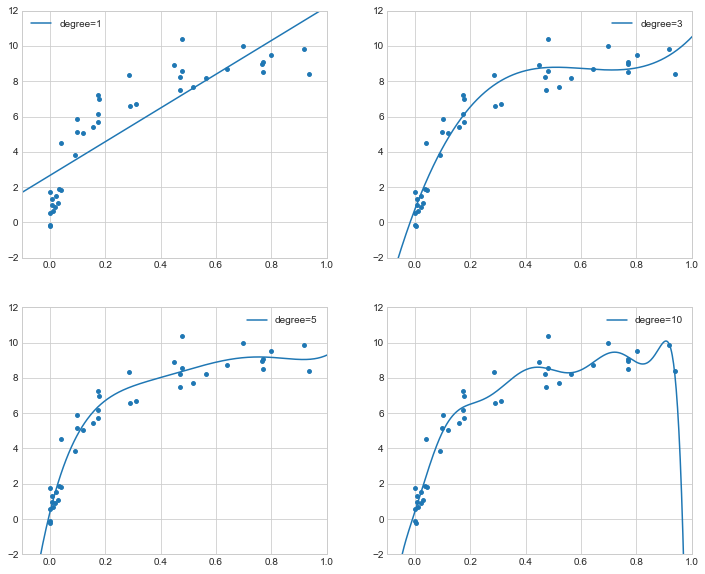

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

X_test = np.linspace(-0.1, 1.1, 500).reshape(-1, 1)

fig = plt.figure(figsize=(12, 10))

for i, degree in enumerate([1, 3, 5, 10], start=1):
    ax = fig.add_subplot(2, 2, i)
    ax.scatter(X.ravel(), y, s=15)
    y_test = make_pipeline(PolynomialFeatures(degree), LinearRegression()).fit(X, y).predict(X_test)
    ax.plot(X_test.ravel(), y_test, label="degree={0}".format(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2, 12)
    ax.legend(loc="best")

- reshape()
    - 2차원으로 만들어줌

- enumerate()
    - start=1 를 인자로 주면 인덱스가 0부터가 아니라 1부터 시작하게 된다.
    - ex) 1, 2, 3

- make_pipeline()
    
    - 선형 모델 ==> 비선형 구조

    - pipeline 앞단에서 피처 엔지니어링 작업(차수 조정)

- 테스트 예측값으로 라인 플롯 그리기

- degree가 높아짐에 따라 학습 데이터에 최적화되는 것으로 보임

- 하지만, degree가 높다고 좋은거라고는 볼 수 없음

- 복잡도가 높아지면 노이즈가 발생할 수 있어 성능에 대한 판단이 필요함

- degree=1 고편향 모델, 언더피트

- degree=10 고분산 모델, 오버피트

### 검증 곡선

- 편향과 분산 사이의 트레이드오프에서 가장 효율적이 지점 ==> 최적의 모델

- 훈련 스코어도 높고 검증 스코어도 높은 지점 찾기

- degree=3 일때가 가장 좋아 보임

<br/>

### 이어서...

6. 머신러닝의 이해-2